In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Coca-Cola_stock_history.csv")


In [5]:
# Parse each date string safely, stripping timezones
df['Date'] = df['Date'].apply(lambda x: parser.parse(x).replace(tzinfo=None))

# Sort by date
df = df.sort_values('Date')

In [6]:
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          15311 non-null  datetime64[ns]
 1   Open          15311 non-null  float64       
 2   High          15311 non-null  float64       
 3   Low           15311 non-null  float64       
 4   Close         15311 non-null  float64       
 5   Volume        15311 non-null  int64         
 6   Dividends     15311 non-null  float64       
 7   Stock Splits  15311 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 957.1 KB
None

Missing Values:
 Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Statistical Summary:
                                 Date          Open          High  \
count                          15311  15311.000000

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a safe default style
plt.style.use('ggplot')  # or use 'classic', 'bmh', 'dark_background', etc.
sns.set(rc={'figure.figsize':(14, 6)})

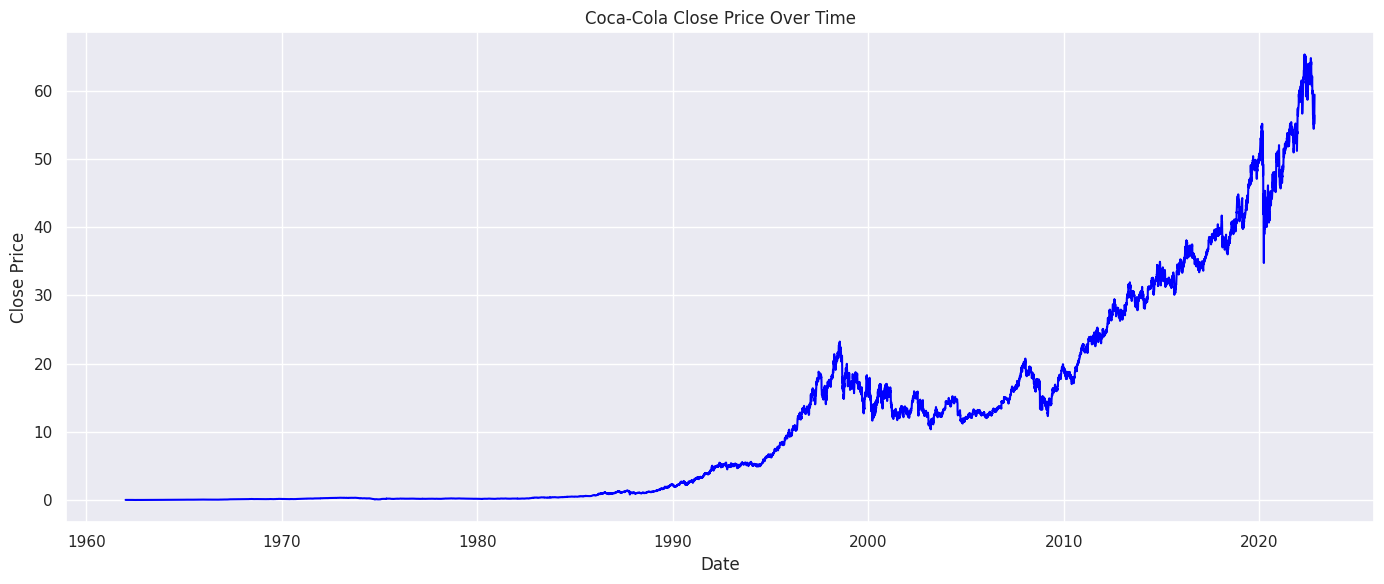

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Coca-Cola Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

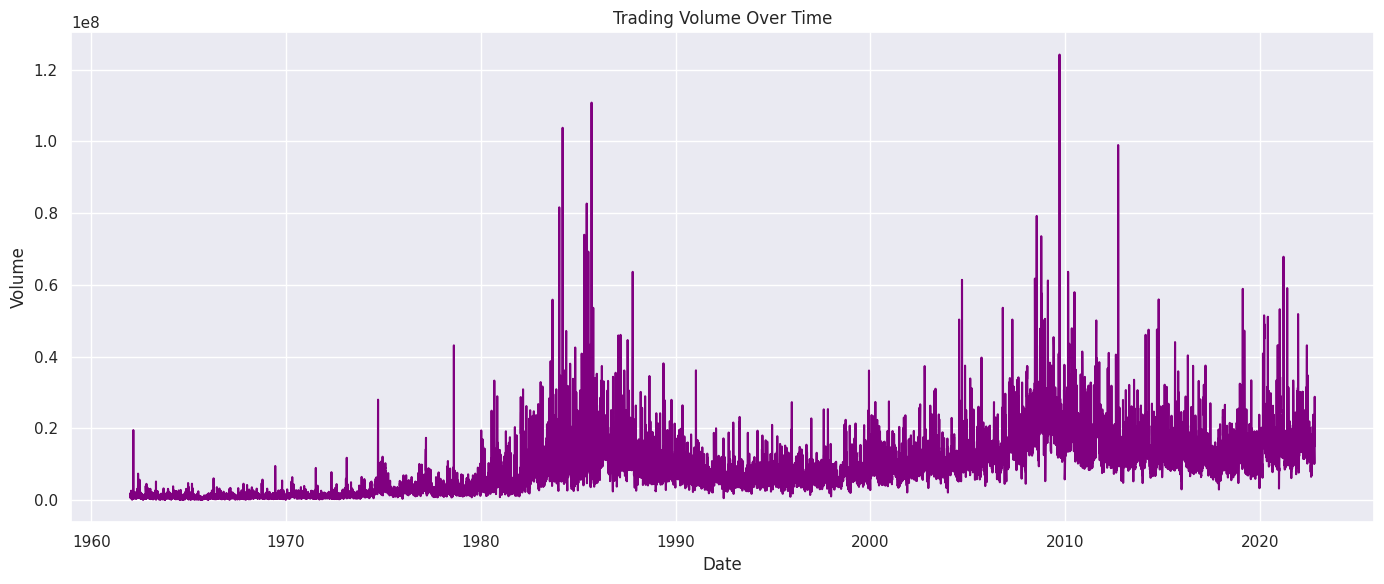

In [11]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Volume'], color='purple')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

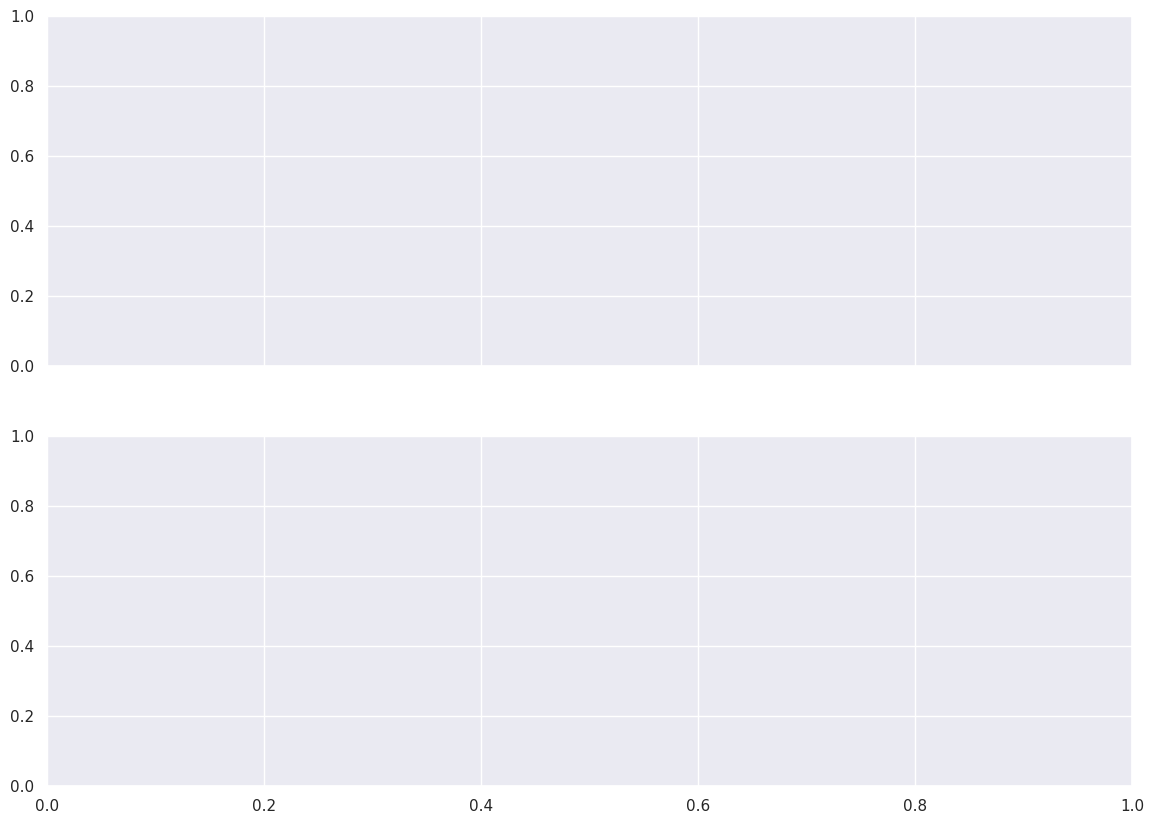

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

In [14]:
ax[0].stem(df['Date'], df['Dividends'], basefmt=" ", linefmt='green', markerfmt='go')
ax[0].set_title('Dividends Over Time')
ax[0].set_ylabel('Dividend Amount')

Text(4.444444444444473, 0.5, 'Dividend Amount')

In [15]:
ax[1].stem(df['Date'], df['Stock Splits'], basefmt=" ", linefmt='red', markerfmt='ro')
ax[1].set_title('Stock Splits Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Split Factor')

plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

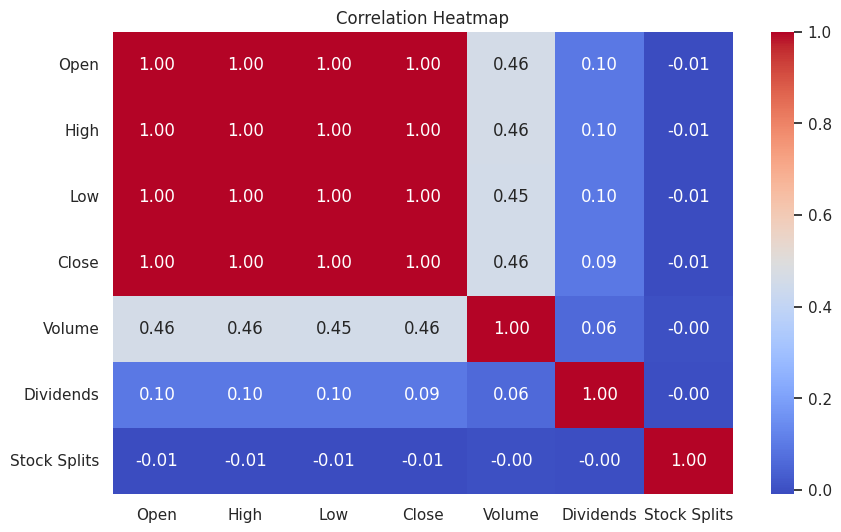

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns='Date').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
df_model = df.drop(['Date'], axis=1)

In [18]:
X = df_model.drop('Close', axis=1)
y = df_model['Close']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.999961869458526
MSE: 0.00844545128137233


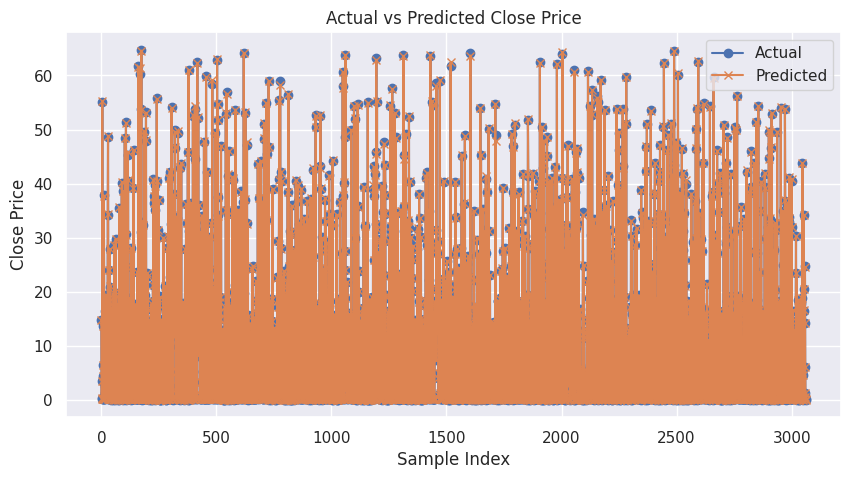

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.title("Actual vs Predicted Close Price")
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()